<a href="https://colab.research.google.com/github/Jarrod555/Computational-Chemistry-Projects/blob/main/RMSD_curcumin_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please upload a .txt file containing pairwise RMSD data in the format:
Frame1 Frame2 RMSD


Saving rmsd_matrix.txt to rmsd_matrix (18).txt
Uploaded file: rmsd_matrix (18).txt
Data successfully parsed.
Parsed 303810 entries.
   Frame1  Frame2     RMSD
0       1       2  0.84539
1       1       3  0.53157
2       1       4  0.67342
3       1       5  0.73686
4       1       6  0.75284
RMSD matrix built with dimensions: (780, 780).
RMSD heatmap data saved to rmsd_heatmap.csv.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

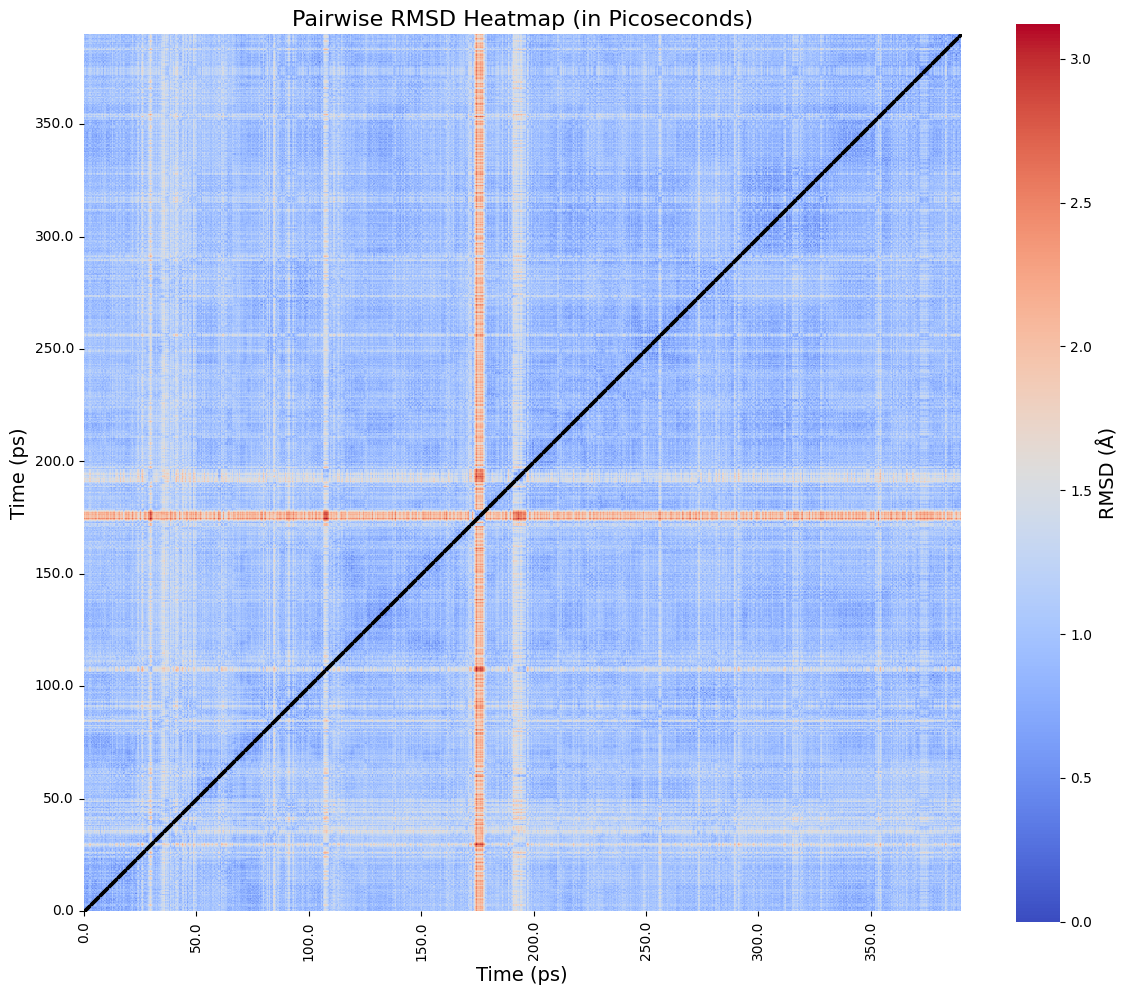

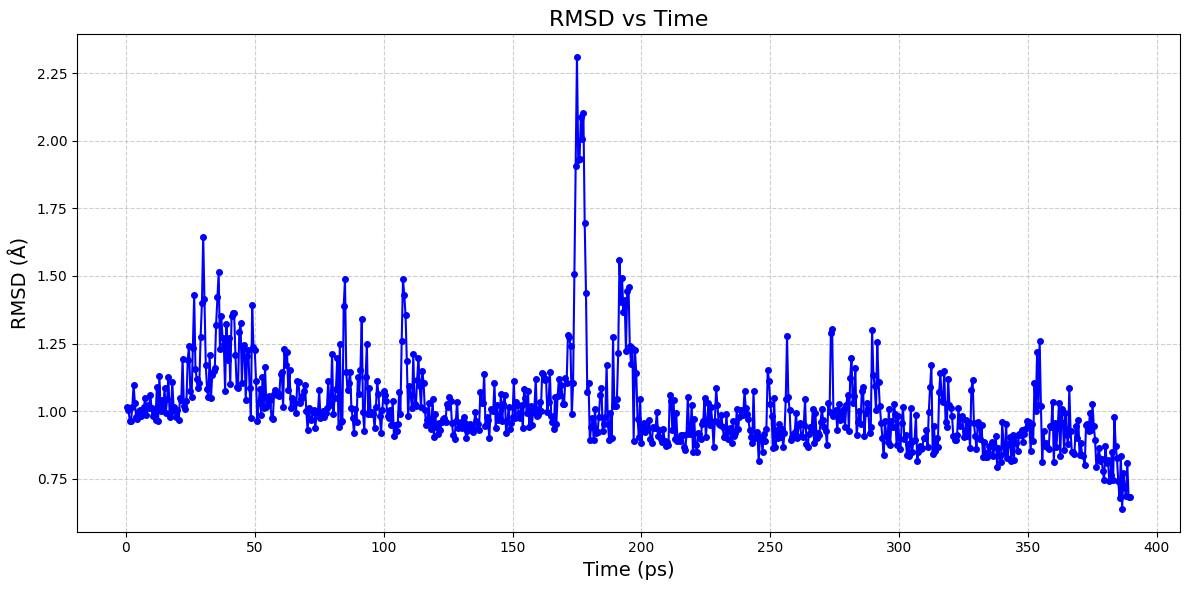

RMSD vs Time data saved to rmsd_vs_time.csv.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:


# Install necessary libraries
!pip install matplotlib seaborn numpy pandas

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from google.colab import files

# File upload
print("Please upload a .txt file containing pairwise RMSD data in the format:")
print("Frame1 Frame2 RMSD")
uploaded = files.upload()
file_name = list(uploaded.keys())[0]  # Get the file name
print(f"Uploaded file: {file_name}")

# Function to parse the .txt file
def parse_rmsd_txt_file(file_path):
    """
    Parses a .txt file containing pairwise RMSD values in the format:
    Frame1 Frame2 RMSD
    """
    try:
        data = pd.read_csv(file_path, sep='\s+', header=None, names=["Frame1", "Frame2", "RMSD"])
        return data
    except Exception as e:
        print(f"Error parsing file: {e}")
        raise

# Parse the uploaded file
rmsd_data = parse_rmsd_txt_file(file_name)
print("Data successfully parsed.")
print(f"Parsed {len(rmsd_data)} entries.")
print(rmsd_data.head())

# Function to build a complete RMSD matrix
def build_complete_rmsd_matrix(data):
    """
    Builds a complete RMSD matrix (N x N) where N is the maximum frame index in the data.
    Ensures all pairwise combinations are included.
    """
    frames = sorted(set(data["Frame1"]).union(data["Frame2"]))
    n_frames = len(frames)
    frame_to_index = {frame: i for i, frame in enumerate(frames)}
    rmsd_matrix = np.zeros((n_frames, n_frames))

    for _, row in data.iterrows():
        try:
            i = frame_to_index[row["Frame1"]]
            j = frame_to_index[row["Frame2"]]
            rmsd_matrix[i, j] = row["RMSD"]
            rmsd_matrix[j, i] = row["RMSD"]  # Ensure symmetry
        except KeyError as e:
            print(f"Key error: {e}")
            raise

    return rmsd_matrix, frames

# Build the complete RMSD matrix
try:
    rmsd_matrix, frames = build_complete_rmsd_matrix(rmsd_data)
    print(f"RMSD matrix built with dimensions: {rmsd_matrix.shape}.")
except Exception as e:
    print(f"Error building RMSD matrix: {e}")
    raise

# Save RMSD Heatmap data as CSV
def save_heatmap_data(matrix, frames, filename="rmsd_heatmap.csv"):
    """
    Saves the RMSD matrix as a CSV file for the heatmap.
    """
    time_labels = [frame * 0.5 for frame in frames]  # Convert frames to picoseconds
    df = pd.DataFrame(matrix, index=time_labels, columns=time_labels)
    df.to_csv(filename)
    print(f"RMSD heatmap data saved to {filename}.")
    files.download(filename)

save_heatmap_data(rmsd_matrix, frames)

# Function to plot RMSD heatmap
def plot_rmsd_heatmap(matrix, frames):
    """
    Plots a heatmap of the RMSD matrix with time in picoseconds.
    Fixes the Y-axis to match the X-axis and adds a thinner black diagonal line.
    """
    time_labels = np.arange(0, len(frames) * 0.5, 0.5)  # Time in picoseconds
    tick_positions = np.arange(0, len(frames), 100)  # Tick every 50 ps
    tick_labels = time_labels[tick_positions]

    cmap = sns.color_palette("coolwarm", as_cmap=True)
    plt.figure(figsize=(12, 10))
    ax = sns.heatmap(matrix, xticklabels=tick_positions, yticklabels=tick_positions, cmap=cmap, square=True)
    ax.invert_yaxis()
    ax.set_xticks(tick_positions)
    ax.set_xticklabels(tick_labels, fontsize=10)
    ax.set_yticks(tick_positions)
    ax.set_yticklabels(tick_labels, fontsize=10)
    plt.title("Pairwise RMSD Heatmap (in Picoseconds)", fontsize=16)
    plt.xlabel("Time (ps)", fontsize=14)
    plt.ylabel("Time (ps)", fontsize=14)


    for i in range(len(matrix)):
        plt.plot([i], [i], 'ks', markersize=2)  # Thick black diagonal

    cbar = ax.collections[0].colorbar
    cbar.set_label("RMSD (Å)", fontsize=14)
    plt.tight_layout()
    plt.show()

# Plot the heatmap
try:
    plot_rmsd_heatmap(rmsd_matrix, frames)
except Exception as e:
    print(f"Error plotting heatmap: {e}")
    raise

# Generate RMSD vs Time plot
def plot_rmsd_vs_time(data, frames):
    """
    Plots RMSD (Y-axis) vs Time (X-axis) from the input data.
    """
    time_labels = data["Frame1"].unique() * 0.5  # Convert frames to picoseconds
    rmsd_values = data.groupby("Frame1")["RMSD"].mean().values

    plt.figure(figsize=(12, 6))
    plt.plot(time_labels, rmsd_values, '-o', color='blue', markersize=4)
    plt.title("RMSD vs Time", fontsize=16)
    plt.xlabel("Time (ps)", fontsize=14)
    plt.ylabel("RMSD (Å)", fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

    # Save the data to a CSV file
    df = pd.DataFrame({"Time (ps)": time_labels, "RMSD (Å)": rmsd_values})
    filename = "rmsd_vs_time.csv"
    df.to_csv(filename, index=False)
    print(f"RMSD vs Time data saved to {filename}.")
    files.download(filename)

# Generate and save the RMSD vs Time plot
try:
    plot_rmsd_vs_time(rmsd_data, frames)
except Exception as e:
    print(f"Error generating RMSD vs Time plot: {e}")
    raise
